# Εργασία 1

## B. Αναγνώριση τύπων γυαλιού με βάση τη χημική τους σύσταση

Παρακάτω βλέπουμε τις εκδόσεις των βιβλιοθηκών που χρησιμοποιήθηκαν στην εργασία

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

np.random.seed(0)

print("Python version:", sys.version)
print('scikit-learn version:', sklearn.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
scikit-learn version: 0.23.2
pandas version: 1.1.3
numpy version: 1.19.2


### 1. Προετοιμασία των δεδομένων

Σκοπός της εργασίας είναι η αξιολόγηση μοντέλων τα οποία κατηγοριοποιούν μετρήσεις διαφόρων χημικών στοιχείων σε 6 τύπους γυαλιού. Τα δεδομένα αυτά είχαν συγκεντρωθεί με σκοπό να μπορεί να αναγνωριστεί ο τύπος του γυαλιού όταν αυτό συλλέγεται από τόπους εγκλήματος έτσι ωστέ να μπορεί να χρησιμοποιηθεί ως αποδεικτικό στοιχείο.


Παρακάτω βλέπουμε τις εκδόσεις των βιβλιοθηκών που χρησιμοποιήθηκαν στην εργασία.

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import sklearn
import sys

np.random.seed(0)

print("Python version:", sys.version)
print('scikit-learn version:', sklearn.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
scikit-learn version: 0.23.2
pandas version: 1.1.3
numpy version: 1.19.2
matplotlib version: 3.3.2


Τα δεδομένα βρίσκονται στο αρχείο glass.data τα οποία διαβάζονται και αποθηκεύονται σε ένα pandas dataframe.

In [3]:
import numpy as np
import urllib.request
import os

np.random.seed(0)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
filename = 'glass.data'

if not os.path.exists(filename):
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Done.')

names = ("Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
df = pd.read_csv(filename, names=names)

Παρακάτω βλέπουμε τα 5 πρώτα παραδείγματα.

In [4]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Ακολουθεί περιγραφή των διαφόρων χαρακτηριστικών.

In [5]:
%%html
<style>
table {float:left}
</style>

|Id|Attribute|Description|
|:-|:-|:-|
|1|Id| Id number: 1 to 214|
|2|RI|refractive index
|3|Na|Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
|4|Mg|Magnesium
|5|Al|Aluminum
|6|Si|Silicon
|7|K|Potassium
|8|Ca|Calcium
|9|Ba|Barium
|10|Fe|Iron
|11|Type|Type of glass: (class attribute)

Ακολουθεί περιγραφή των κλάσεων. Η 4η κλάση δεν χρησιμοποιείται.

|Class|Description|
|:-|:-|
|1|building_windows_float_processed
|2|building_windows_non_float_processed
|3|vehicle_windows_float_processed
|4|vehicle_windows_non_float_processed (none in this database)
|5|containers
|6|tableware
|7|headlamps

Όλα τα χαρακτηριστικά είναι πραγματικοί αριθμοί εκτός από το Id και τη μεταβλητή στόχο Type οι οποίοι είναι ακέραιοι. Παρατηρούμε ότι δεν υπάρχουν τιμές που λείπουν.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Βγάζουμε εκτός του dataframe το Id γιατί είναι απλώς ένας αύξων αριθμός και δεν προσφέρει κάποια χρήσιμη πληροφορία για την κατηγοριοποίηση

In [7]:
df.drop(labels='Id', axis=1, inplace=True)

Το παρακάτω ιστόγραμμα μας δείχνει ότι οι κλάσεις των ψηφίων δεν είναι ζυγισμένες. 

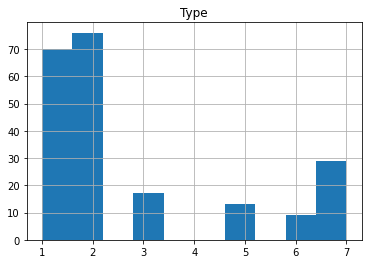

In [8]:
import matplotlib.pyplot as plt

df.hist(column='Type')
plt.show()

To dataset χωρίζεται σε train set και test set χρησιμοποιώντας την συνάρτηση StratifiedShuffleSplit η οποία μας εξασφαλίζει οτι η κατανομή στα δυο set θα είναι ίδια ως προς τη μεταβλητή στόχο.

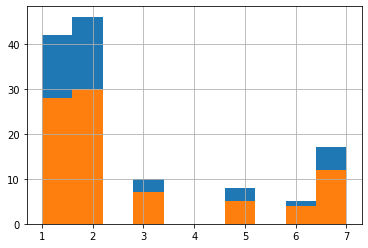

In [12]:
from sklearn import model_selection

split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

for train_index, test_index in split.split(df, df['Type']):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

df_train_x = df_train.drop('Type', axis=1)
df_train_y = df_train['Type']
df_test_x = df_test.drop('Type', axis=1)
df_test_y = df_test['Type']
    
df_train_y.hist()
df_test_y.hist()
plt.show()

Παρακάτω βλέπουμε κάποια στατιστικά δεδομένα για τις ανέξαρτητες μεταβλητές και την εξαρτημένη μεταβλητή Type.

In [13]:
df_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.518346,13.347344,2.63375,1.434531,72.693672,0.532500,9.016641,0.159531,0.057656,2.757812
std,0.003189,0.792129,1.46517,0.494346,0.832269,0.791642,1.401949,0.503831,0.096330,2.091400
min,1.511150,10.730000,0.00000,0.340000,69.810000,0.000000,6.470000,0.000000,0.000000,1.000000
25%,1.516525,12.885000,1.83250,1.190000,72.330000,0.137500,8.317500,0.000000,0.000000,1.000000
50%,1.517720,13.210000,3.45500,1.335000,72.845000,0.560000,8.605000,0.000000,0.000000,2.000000
75%,1.518985,13.702500,3.58250,1.620000,73.102500,0.600000,9.200000,0.000000,0.102500,3.000000
max,1.533930,17.380000,4.49000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Ακολουθούν ιστογράμματα των χαρακτηριστικών.

[]

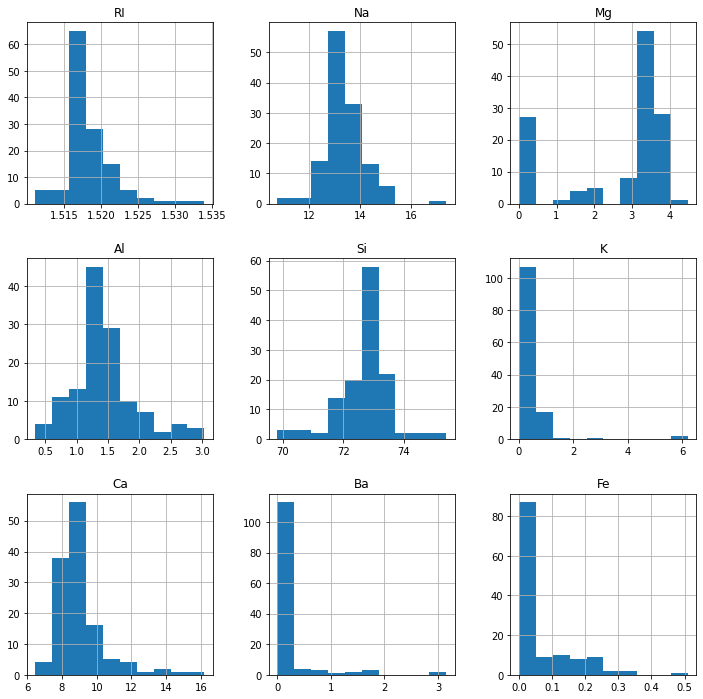

In [15]:
df_train_x.hist(figsize=(12, 12))
plt.plot()

Μεγαλύτερη γραμμική συσχέτιση με το Type έχουν τα χαρακτηριστικά Mg, Al, Ba, Na.

In [16]:
corr_matrix = df_train.corr()
abs(corr_matrix["Type"]).sort_values(ascending=False)

Type    1.000000
Mg      0.746668
Al      0.571282
Na      0.530988
Ba      0.506686
Fe      0.214283
RI      0.171949
Si      0.163369
K       0.044884
Ca      0.000844
Name: Type, dtype: float64

Οι κλάσεις δεν φαίνονται διαχωρίσιμες στο επίπεδο των δυο χαρακτηριστικών που έχουν τη μεγαλύτερη συσχέτιση με το Type.

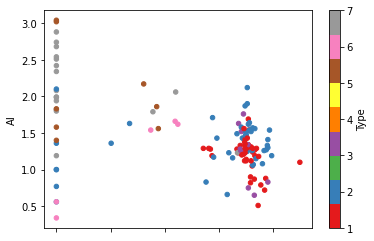

In [17]:
df_train.plot.scatter(x='Mg', y='Al', c='Type', colormap='Set1')
plt.show()

In [18]:
x_train = df_train_x.to_numpy()
y_train = df_train_y.to_numpy()
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy()

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (128, 9)
y_train.shape = (128,)
x_test.shape = (86, 9)
y_test.shape = (86,)


### 2. Μείωση διαστάσεων

Εφαρμόζεται κανονικοποίηση και μείωση των διαστάσεων με την τεχνική PCA διατηρώντας το 90% της διασποράς. Η διάσταση των δεδομένων μειώνεται από 9 σε 6. 

In [22]:
from sklearn import decomposition
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

print(np.min(x_train_scaled, axis=0))
print(np.max(x_train_scaled, axis=0))

pca = decomposition.PCA(n_components=0.9, svd_solver='full')
x_train_reduced = pca.fit_transform(x_train_scaled)

print('x_train.shape', x_train.shape)
print('x_train_reduced.shape =', x_train_reduced.shape)

[-2.26546382 -3.31717155 -1.80463562 -2.22280045 -3.47844447 -0.67529527
 -1.82363735 -0.31788073 -0.60087918]
[4.90571354 5.11091162 1.27189554 3.26042464 3.27658519 7.19997914
 5.13680883 5.95878482 4.71421474]
x_train.shape (128, 9)
x_train_reduced.shape = (128, 6)


Η προηγούμενη διαδικάσια γίνεται μόνο για την απεικόνιση των παραδειγμάτων στο επίπεδο των δυο πρώτων ιδιοδιανυσμάτων. Αργότερα εφαρμόζεται κανονικά μέσω pipeline.

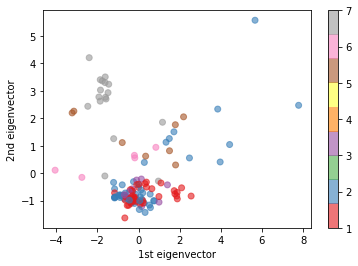

In [23]:
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap='Set1', alpha=0.6)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.colorbar()
plt.show()

### 3. Αξιολόγηση μοντέλων

#### 3.1 Περιγραφή της διαδικασίας

#### 3.2 Linear SVM

Ακολουθεί βελτιστοποίηση του SVM classifier με linear kernel ως προς την παράμετρο C. Το C είναι η παράμετρος αντιστάθμισης μεταξύ της προσπάθειας για μέγιστο περιθώριο μεταξύ των κλάσεων και για ελάχιστο αριθμό λαθών.

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [29]:
from sklearn import pipeline
from sklearn import svm

scaler = preprocessing.StandardScaler()
pca = decomposition.PCA(n_components=0.9, svd_solver='full')
svm = svm.SVC(kernel='linear')

pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('svm', svm)
    ])

param_grid = {
    "svm__C": (0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2., 5., 10., 20., 50., 100., 200., 500., 1000.)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro')
search.fit(x_train, y_train)

print()
print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)


Best F1 = 0.35938461538461536
Best params = {'svm__C': 0.001}
